Gradient Boosting Performance (scikit-learn):
RMSE: 1.92 mpg
MAE:  1.18 mpg
R²:   0.858


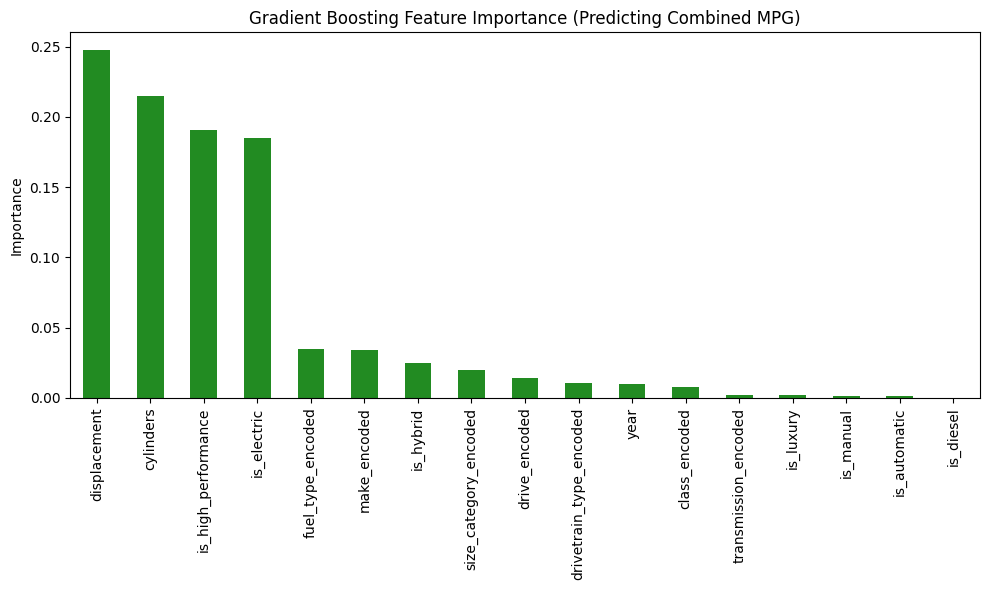

Train Score: 98.96332707831542 %
Test Score: 85.83531483576756 %


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Car Data P.csv")

# Features that are available when predicting a new car (no direct mpg derivatives)
feature_cols = [
    'cylinders', 'displacement', 'year',
    'make_encoded', 'class_encoded', 'drive_encoded',
    'fuel_type_encoded', 'transmission_encoded',
    'size_category_encoded', 'drivetrain_type_encoded',
    'is_high_performance', 'is_luxury', 'is_electric',
    'is_diesel', 'is_hybrid', 'is_automatic', 'is_manual'
]

X = df[feature_cols].copy()
y = df['combination_mpg'].copy()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Gradient Boosting Regressor (scikit-learn)
model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Performance (scikit-learn):")
print(f"RMSE: {rmse:.2f} mpg")
print(f"MAE:  {mae:.2f} mpg")
print(f"R²:   {r2:.3f}")

# Feature importance
importance = model.feature_importances_
feat_imp = pd.Series(importance, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar', color='forestgreen')
plt.title("Gradient Boosting Feature Importance (Predicting Combined MPG)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
Train_Score = model.score(X_train, y_train)
Test_Score = model.score(X_test, y_test)
print("Train Score:", Train_Score * 100 , "%")
print("Test Score:", Test_Score * 100 , "%")